In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Загрузка датасетов

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# целевые переменные

y_columns = list(set(df.columns).difference(set(df_test.columns)))
y_columns

['Оператор', 'Есть ли Интернет', 'Состав ДХ']

# Предобработка переменных

<b> Заранее отделим целевые переменные от признаков </b>

## целевые переменные

In [4]:
y = df.loc[:, y_columns].copy()
y.tail(3)

,Оператор,Есть ли Интернет,Состав ДХ
3241,Подключен только к Триколор ТВ,Нет,Есть члены семьи в возрасте 55+ лет и нет до 1...
3242,Подключен только к Триколор ТВ,Есть,Есть члены семьи в возрасте 55+ лет и есть до ...
3243,Подключен к Триколор ТВ и к другому оператору ...,Есть,Есть члены семьи в возрасте 55+ лет и нет до 1...


In [5]:
y.nunique()

Оператор            2
Есть ли Интернет    2
Состав ДХ           4
dtype: int64

<b> Убеждаемся, что все целевые переменные определены: </b>

In [6]:
y.isna().sum()

Оператор            0
Есть ли Интернет    0
Состав ДХ           0
dtype: int64

<b> Кодируем целевые переменные: </b>

In [7]:
y_encoder_internet = LabelEncoder()
y_encoder_household = LabelEncoder()
y_encoder_operator = LabelEncoder()

y['Есть ли Интернет'] = y_encoder_internet.fit_transform(y['Есть ли Интернет'])
y['Состав ДХ'] = y_encoder_household.fit_transform(y['Состав ДХ'])
y['Оператор'] = y_encoder_operator.fit_transform(y['Оператор'])

In [8]:
y.head()

,Оператор,Есть ли Интернет,Состав ДХ
0,1,1,2
1,1,0,2
2,1,0,1
3,1,1,1
4,1,0,2


In [9]:
y_encoder_internet.inverse_transform(y['Есть ли Интернет'])

array(['Нет', 'Есть', 'Есть', ..., 'Нет', 'Есть', 'Есть'], dtype=object)

## Признаки

In [10]:
X = df[:].copy()
X = X.drop(y_columns, axis=1)

del X['hhid']
del X['Почтовый индекс']
del X['id']

X.tail(2)

,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,Телесмотрение утром Пн-Пт,Телесмотрение в рабочее время Пн-Пт,...,Просмотр жанра спорт в рабочее время,Просмотр жанра спорт в праздники,Просмотр жанра музыка в рабочее время,Просмотр жанра музыка в праздники,Просмотр жанра образования в рабочее время,Просмотр жанра образование в праздники,Размер ДХ,Тип ресивера,ФО,Тип нас.пункта
3242,871,299,150.0,422,0,0,410.0,215,150,45,...,0,0,0,0,194,2,3.0,Ресивер с поддержкой HEVC,Уральский федеральный округ,Город с численностью менее 45 тыс.
3243,1558,343,185.0,998,32,0,667.0,261,127,279,...,0,0,0,0,0,0,2.0,Ресивер с поддержкой HDTV,Центральный федеральный округ,Сельский населенный пункт


# Анализ тестовых данных

In [11]:
df_test.isna().sum()

id                                            0
hhid                                          0
Общее телесмотрение                           0
Телесмотрение ночью                           0
Телесмотрение утром                           0
Телесмотрение в рабочее время                 0
Телесмотрение в вечернее время                0
Телесмотрение в прайм тайм                    0
Общее телесмотрение Пн-Пт                     0
Телесмотрение ночью Пн-Пт                     0
Телесмотрение утром Пн-Пт                     0
Телесмотрение в рабочее время Пн-Пт           0
Телесмотрение в вечернее время Пн-Пт          0
Телесмотрение в прайм тайм Пн-Пт              0
Общее телесмотрение в выходные                0
Телесмотрение ночью в выходные                0
Телесмотрение утром в выходные                0
Телесмотрение в рабочее время в выходные      0
Телесмотрение вечером в выходные              0
Телесмотрение в прайм тайм в выходные         0
Просмотр жанра кино в рабочее время     

<b>тестовые данные не содержат пропусков</b>

# Анализ данных для обучения

In [12]:
X.head(2)

,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,Телесмотрение утром Пн-Пт,Телесмотрение в рабочее время Пн-Пт,...,Просмотр жанра спорт в рабочее время,Просмотр жанра спорт в праздники,Просмотр жанра музыка в рабочее время,Просмотр жанра музыка в праздники,Просмотр жанра образования в рабочее время,Просмотр жанра образование в праздники,Размер ДХ,Тип ресивера,ФО,Тип нас.пункта
0,647,437,15.0,12,120,63,195.0,0,0,12,...,0,0,0,0,0,1,4.0,Ресивер с поддержкой HDTV,Северо-Западный федеральный округ,Город с численностью от 45 тыс. до 400 тыс.
1,2657,538,363.0,1582,174,0,415.0,133,0,282,...,0,0,0,0,1,109,4.0,Ресивер с поддержкой HEVC,Уральский федеральный округ,Город с численностью менее 45 тыс.


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Общее телесмотрение                         3244 non-null   int64  
 1   Телесмотрение ночью                         3244 non-null   int64  
 2   Телесмотрение утром                         3219 non-null   float64
 3   Телесмотрение в рабочее время               3244 non-null   int64  
 4   Телесмотрение в вечернее время              3244 non-null   int64  
 5   Телесмотрение в прайм тайм                  3244 non-null   int64  
 6   Общее телесмотрение Пн-Пт                   3219 non-null   float64
 7   Телесмотрение ночью Пн-Пт                   3244 non-null   int64  
 8   Телесмотрение утром Пн-Пт                   3244 non-null   int64  
 9   Телесмотрение в рабочее время Пн-Пт         3244 non-null   int64  
 10  Телесмотрени

In [14]:
X.describe()

,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,Телесмотрение утром Пн-Пт,Телесмотрение в рабочее время Пн-Пт,...,Просмотр жанра комедия в праздники,Просмотр жанра хоби в рабочее время,Просмотр жанра хобби в праздники,Просмотр жанра спорт в рабочее время,Просмотр жанра спорт в праздники,Просмотр жанра музыка в рабочее время,Просмотр жанра музыка в праздники,Просмотр жанра образования в рабочее время,Просмотр жанра образование в праздники,Размер ДХ
count,3244.000000,3244.000000,3219.000000,3244.000000,3244.000000,3244.000000,3219.000000,3244.000000,3244.000000,3244.000000,...,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3219.000000
mean,1321.359741,141.231504,194.200062,779.622688,126.118064,80.207460,553.915191,56.258631,86.196979,327.086005,...,1.911837,10.471332,24.706535,4.172010,4.685265,2.529285,2.387793,5.238286,9.227189,2.999689
std,1090.990367,225.381630,209.586696,649.145021,154.810000,155.594555,528.085000,103.379151,107.460277,326.492802,...,11.404577,32.687413,63.149443,24.675045,26.961420,17.641199,16.014969,22.894338,35.167541,1.377142
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,474.000000,0.000000,0.000000,268.750000,0.000000,0.000000,72.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1066.000000,33.000000,136.000000,636.500000,73.000000,0.000000,451.000000,0.000000,27.000000,250.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1935.000000,194.000000,318.000000,1165.000000,201.000000,97.000000,849.000000,70.000000,169.000000,549.000000,...,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,7799.000000,1580.000000,1076.000000,4588.000000,699.000000,951.000000,3400.000000,661.000000,666.000000,1847.000000,...,172.000000,353.000000,675.000000,442.000000,504.000000,259.000000,236.000000,419.000000,463.000000,9.000000


## Обработка пропусков

In [15]:
X.isna().sum()

Общее телесмотрение                            0
Телесмотрение ночью                            0
Телесмотрение утром                           25
Телесмотрение в рабочее время                  0
Телесмотрение в вечернее время                 0
Телесмотрение в прайм тайм                     0
Общее телесмотрение Пн-Пт                     25
Телесмотрение ночью Пн-Пт                      0
Телесмотрение утром Пн-Пт                      0
Телесмотрение в рабочее время Пн-Пт            0
Телесмотрение в вечернее время Пн-Пт           0
Телесмотрение в прайм тайм Пн-Пт               0
Общее телесмотрение в выходные                 0
Телесмотрение ночью в выходные                 0
Телесмотрение утром в выходные                 0
Телесмотрение в рабочее время в выходные       0
Телесмотрение вечером в выходные               0
Телесмотрение в прайм тайм в выходные          0
Просмотр жанра кино в рабочее время            0
Просмотр жанра кино в праздники                0
Просмотр жанра прикл

In [16]:
X.isna().mean().sort_values(ascending=False)[0:5]

Тип нас.пункта                          0.007707
Телесмотрение утром                     0.007707
Размер ДХ                               0.007707
Общее телесмотрение Пн-Пт               0.007707
Просмотр жанра спорт в рабочее время    0.000000
dtype: float64

<b>процент пропусков: < 1%. <br>Заменим пропуски на моду и медиану</b> 

In [17]:
for COL in X.columns[X.isna().sum() != 0]:
    
    if X[COL].dtype != 'object':
        replacement = X[COL].median()
    else:
        replacement = X[COL].mode()[0]
    
    X.loc[X[COL].isna(), [COL]] = replacement;
    print(f'NaN in "{COL}" replaced by: {replacement}')

NaN in "Телесмотрение утром" replaced by: 136.0
NaN in "Общее телесмотрение Пн-Пт" replaced by: 451.0
NaN in "Размер ДХ" replaced by: 3.0
NaN in "Тип нас.пункта" replaced by: Сельский населенный пункт


## Обработка строковых признаков 

In [18]:
text_columns = []
for TYPE, COL in zip(X.dtypes, X.columns):
    if TYPE == 'object':
        print(f'{COL}: nunique = {X[COL].nunique()}')
        text_columns.append(COL)

Тип ресивера: nunique = 2
ФО: nunique = 7
Тип нас.пункта: nunique = 4


<b>Общее количество уникальных строковых значений небольшое: 13 шт. <br>Заменим на категориальные переменные</b>

In [19]:
X = pd.get_dummies(X, columns = text_columns)
X

,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,Телесмотрение утром Пн-Пт,Телесмотрение в рабочее время Пн-Пт,...,ФО_Северо-Западный федеральный округ,ФО_Северо-Кавказский федеральный округ,ФО_Сибирский федеральный округ,ФО_Уральский федеральный округ,ФО_Центральный федеральный округ,ФО_Южный федеральный округ,Тип нас.пункта_Город более 400 тыс.,Тип нас.пункта_Город с численностью менее 45 тыс.,Тип нас.пункта_Город с численностью от 45 тыс. до 400 тыс.,Тип нас.пункта_Сельский населенный пункт
0,647,437,15.0,12,120,63,195.0,0,0,12,...,True,False,False,False,False,False,False,False,True,False
1,2657,538,363.0,1582,174,0,415.0,133,0,282,...,False,False,False,True,False,False,False,True,False,False
2,1385,0,49.0,1134,202,0,729.0,0,49,571,...,False,False,False,False,False,True,True,False,False,False
3,2861,607,857.0,1374,23,0,1249.0,294,270,662,...,False,False,False,False,False,False,False,False,False,True
4,478,174,44.0,53,79,128,260.0,0,0,53,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,697,0,8.0,571,118,0,244.0,0,0,126,...,False,False,False,False,True,False,False,False,False,True
3240,532,2,0.0,6,164,360,258.0,1,0,6,...,True,False,False,False,False,False,False,True,False,False
3241,1153,212,198.0,743,0,0,505.0,29,197,279,...,False,False,False,False,True,False,False,False,False,True
3242,871,299,150.0,422,0,0,410.0,215,150,45,...,False,False,False,True,False,False,False,True,False,False


# Train - test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2757, 48), (487, 48), (2757, 3), (487, 3))

In [22]:
y_train

,Оператор,Есть ли Интернет,Состав ДХ
1395,1,1,3
2153,1,0,1
3084,1,1,1
1459,1,1,2
2271,1,1,1
...,...,...,...
1095,1,1,0
1130,0,0,2
1294,1,1,1
860,1,1,2


# MODELS

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. MODEL 'Есть ли Интернет'

### DecisionTreeClassifier

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train['Есть ли Интернет'])
dt.score(X_train, y_train['Есть ли Интернет']), dt.score(X_test, y_test['Есть ли Интернет'])

(0.998911860718172, 0.839835728952772)

In [25]:
print(classification_report(y_test['Есть ли Интернет'], dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       301
           1       0.79      0.79      0.79       186

    accuracy                           0.84       487
   macro avg       0.83      0.83      0.83       487
weighted avg       0.84      0.84      0.84       487



### RandomForestClassifier

In [26]:
clf_rf1 = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_rf1.fit(X_train, y_train['Есть ли Интернет'])

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
clf_rf1.score(X_train, y_train['Есть ли Интернет']), clf_rf1.score(X_test, y_test['Есть ли Интернет'])

(0.998911860718172, 0.8685831622176592)

In [28]:
print(classification_report(y_test['Есть ли Интернет'], clf_rf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       301
           1       0.96      0.69      0.80       186

    accuracy                           0.87       487
   macro avg       0.90      0.83      0.85       487
weighted avg       0.88      0.87      0.86       487



In [29]:
sorted_fi1 = sorted(zip(clf_rf1.feature_importances_, X.columns), key=lambda x: x[0])[-15:]
fi_scores1, fi_features1 = list(map(lambda x: x[0], sorted_fi1)), list(map(lambda x: x[1], sorted_fi1)) 
sorted_fi1

[(0.02277310550808999, 'Телесмотрение в вечернее время Пн-Пт'),
 (0.02751164046901027, 'Телесмотрение ночью в выходные'),
 (0.02855975394956177, 'Телесмотрение ночью'),
 (0.02894655348637607, 'Телесмотрение утром Пн-Пт'),
 (0.033314946701568524, 'Телесмотрение в вечернее время'),
 (0.03490588329282828, 'Телесмотрение вечером в выходные'),
 (0.03549682449049505, 'Телесмотрение утром в выходные'),
 (0.03771602311124075, 'Телесмотрение утром'),
 (0.04246662873068249, 'Общее телесмотрение Пн-Пт'),
 (0.044971848481530685, 'Телесмотрение в рабочее время Пн-Пт'),
 (0.04603717977664453, 'Размер ДХ'),
 (0.050820782401747075, 'Телесмотрение в рабочее время в выходные'),
 (0.051950319317053816, 'Общее телесмотрение'),
 (0.052922037953659816, 'Телесмотрение в рабочее время'),
 (0.053954993988456004, 'Общее телесмотрение в выходные')]

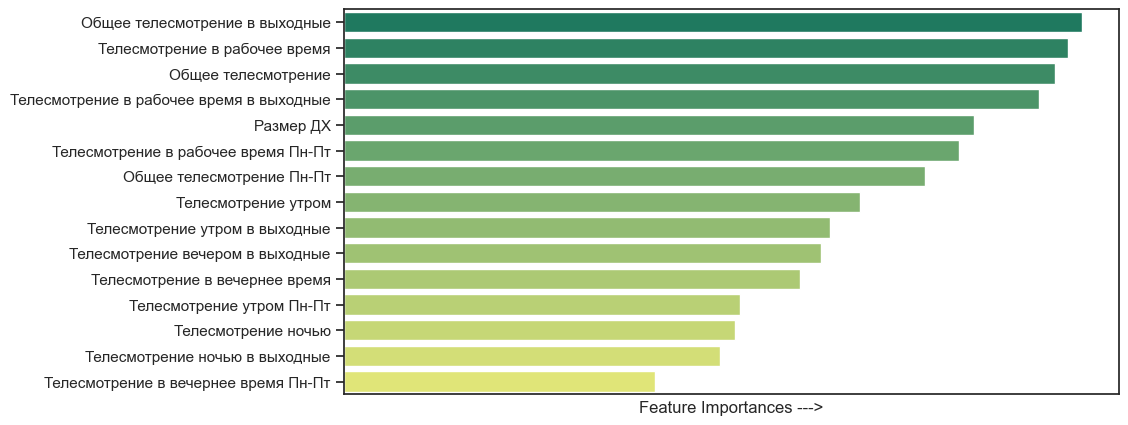

In [30]:
sns.set(style="ticks")
plt.figure(figsize=(10, 5))
sns.barplot(x=fi_scores1[::-1], y=fi_features1[::-1], hue=fi_features1, palette="summer", legend=False)
plt.xticks([])
plt.xlabel('Feature Importances --->')
plt.show()

# 2. MODEL 'Оператор'

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train['Оператор'])

In [33]:
clf_rf2 = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_rf2.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
clf_rf2.score(X_train, y_train['Оператор']), clf_rf2.score(X_test, y_test['Оператор'])

(1.0, 0.9548254620123203)

In [35]:
print(classification_report(y_test['Оператор'], clf_rf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75        53
           1       0.96      1.00      0.98       434

    accuracy                           0.95       487
   macro avg       0.95      0.81      0.86       487
weighted avg       0.95      0.95      0.95       487



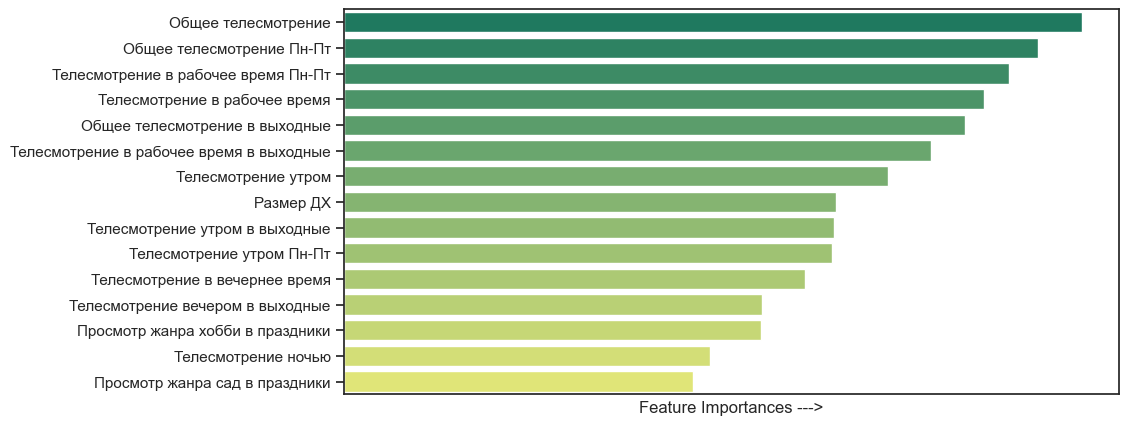

In [36]:
sorted_fi2 = sorted(zip(clf_rf2.feature_importances_, X.columns), key=lambda x: x[0])[-15:]
fi_scores2, fi_features2 = list(map(lambda x: x[0], sorted_fi2)), list(map(lambda x: x[1], sorted_fi2))

sns.set(style="ticks")
plt.figure(figsize=(10, 5))
sns.barplot(x=fi_scores2[::-1], y=fi_features2[::-1], hue=fi_features2, palette="summer", legend=False)
plt.xticks([])
plt.xlabel('Feature Importances --->')
plt.show()

# 3. MODEL 'Состав ДХ'

In [37]:
clf_rf3 = RandomForestClassifier(random_state=42, class_weight='balanced', min_samples_split=4, min_samples_leaf=2)
clf_rf3.fit(X_train, y_train['Состав ДХ'])

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

In [38]:
clf_rf3.score(X_train, y_train['Состав ДХ']), clf_rf3.score(X_test, y_test['Состав ДХ'])

(0.99056945955749, 0.8521560574948666)

In [39]:
print(classification_report(y_test['Состав ДХ'], clf_rf3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.67      0.79        55
           1       0.82      0.91      0.86       169
           2       0.85      0.97      0.91       169
           3       0.88      0.64      0.74        94

    accuracy                           0.85       487
   macro avg       0.88      0.80      0.82       487
weighted avg       0.86      0.85      0.85       487



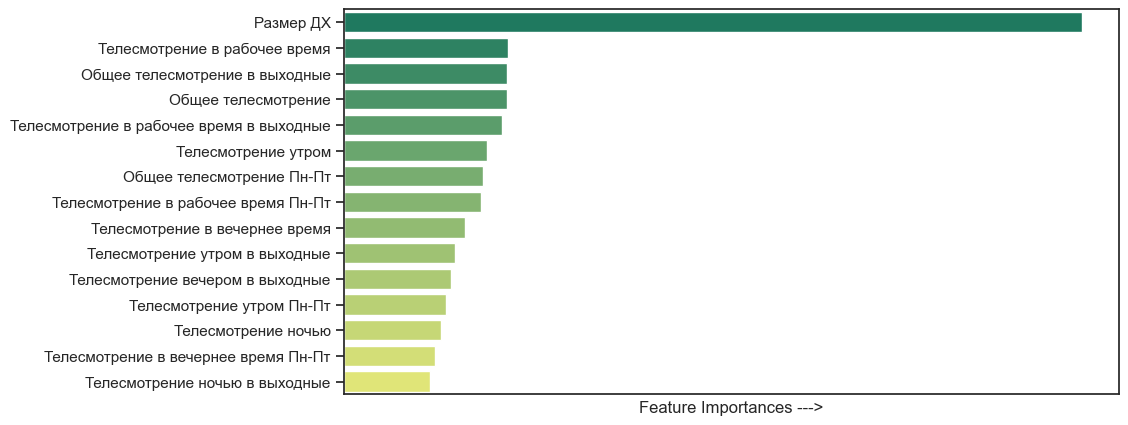

In [40]:
sorted_fi3 = sorted(zip(clf_rf3.feature_importances_, X.columns), key=lambda x: x[0])[-15:]
fi_scores3, fi_features3 = list(map(lambda x: x[0], sorted_fi3)), list(map(lambda x: x[1], sorted_fi3))

sns.set(style="ticks")
plt.figure(figsize=(10, 5))
sns.barplot(x=fi_scores3[::-1], y=fi_features3[::-1], hue=fi_features3, palette="summer", legend=False)
plt.xticks([])
plt.xlabel('Feature Importances --->')
plt.show()

## Выделение наиболее важных признаков для трех моделей 

In [41]:
main_features = list(set.intersection(set(fi_features1), set(fi_features2), set(fi_features3)))
main_features

['Телесмотрение в вечернее время',
 'Телесмотрение утром в выходные',
 'Общее телесмотрение Пн-Пт',
 'Телесмотрение утром',
 'Общее телесмотрение',
 'Телесмотрение утром Пн-Пт',
 'Телесмотрение в рабочее время',
 'Телесмотрение в рабочее время Пн-Пт',
 'Размер ДХ',
 'Телесмотрение ночью',
 'Телесмотрение вечером в выходные',
 'Общее телесмотрение в выходные',
 'Телесмотрение в рабочее время в выходные']

### проверка на наличие выбросов 

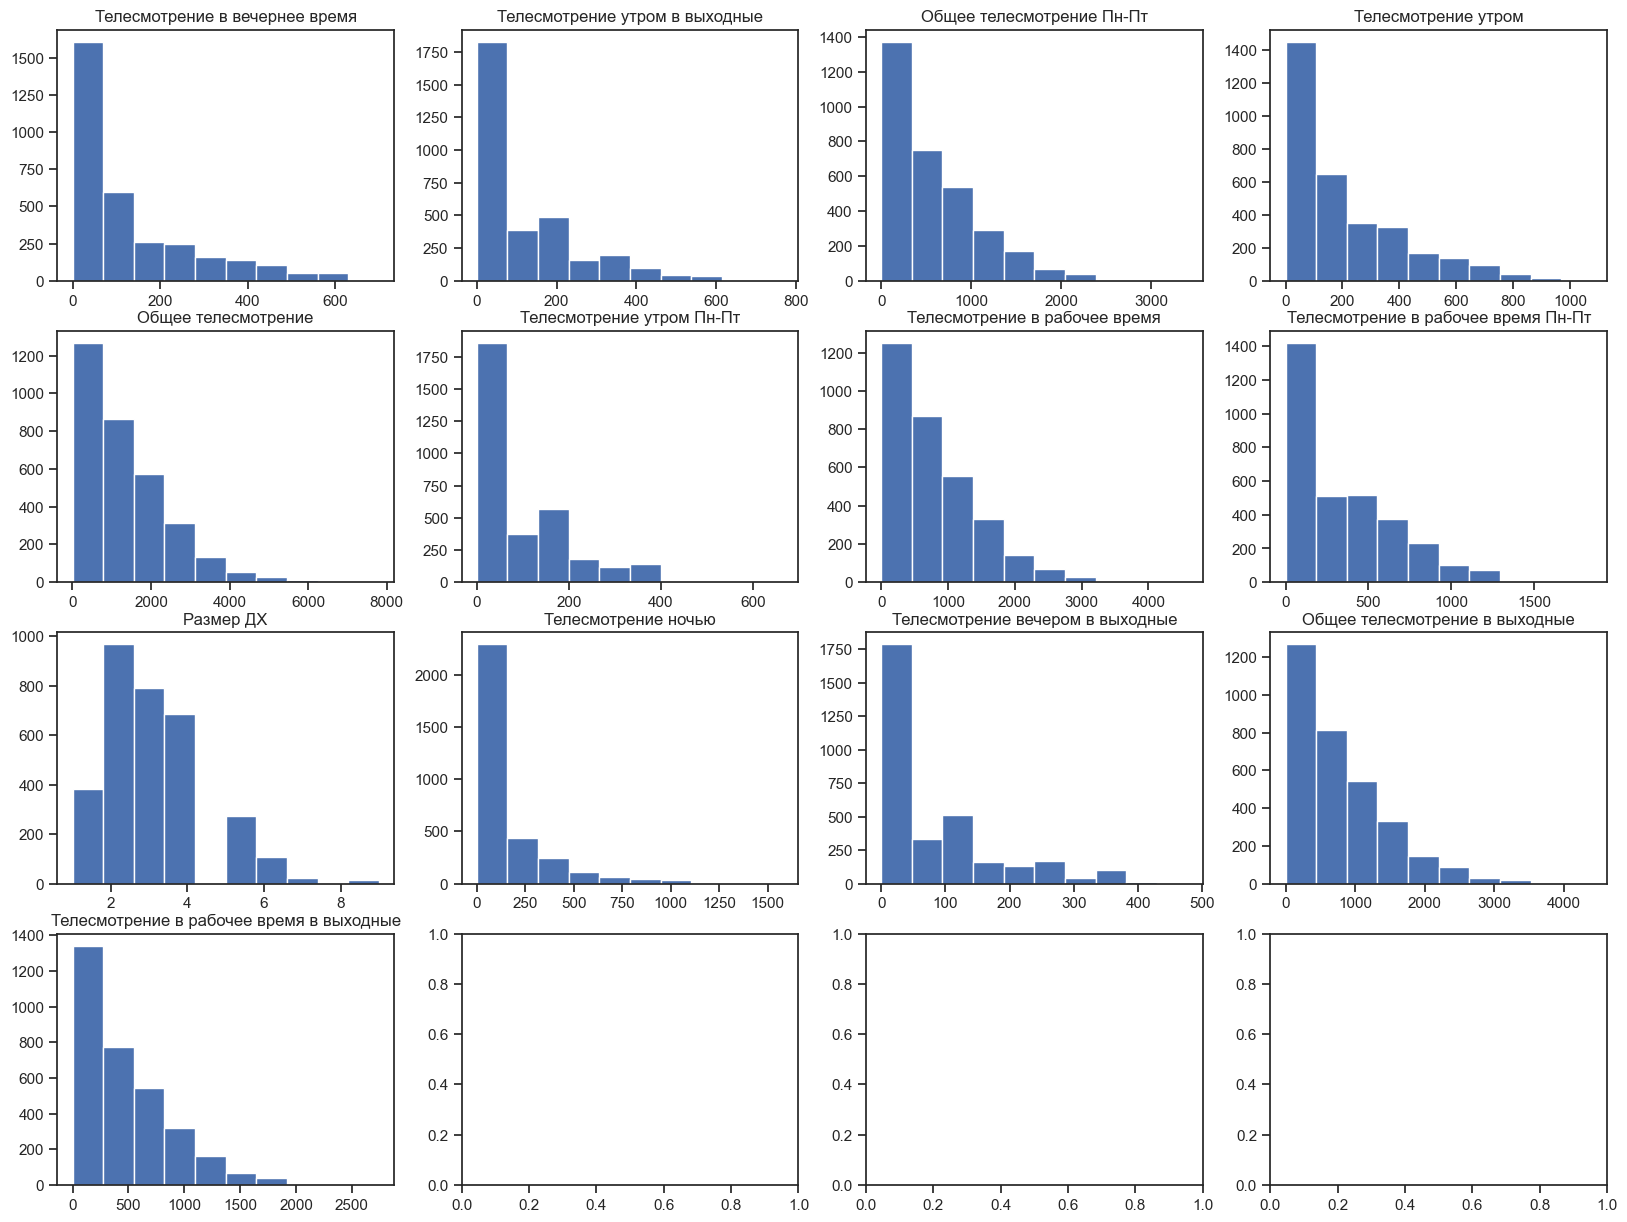

In [42]:
k, m = 4, 4
fig, axa = plt.subplots(k,m, figsize=(20,15))
cols = iter(main_features)

for i in range(k):
  for j in range(m):
    ax = axa[i, j]
    try:
        current_column = next(cols)
    except StopIteration:
        break
    ax.hist(X[current_column])
    ax.set_title(current_column)

plt.show()

<b> В важных признаках выбросов не обнаружено 

# test.csv

In [43]:
df_test.head(2)

,id,hhid,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,...,Просмотр жанра спорт в праздники,Просмотр жанра музыка в рабочее время,Просмотр жанра музыка в праздники,Просмотр жанра образования в рабочее время,Просмотр жанра образование в праздники,Размер ДХ,Тип ресивера,ФО,Тип нас.пункта,Почтовый индекс
0,3244,5299,2613,266,265,1973,109,0,1004,52,...,111,0,0,2,9,1,Ресивер с поддержкой HDTV,Центральный федеральный округ,Город с численностью менее 45 тыс.,152470
1,3245,4357,1914,1011,512,391,0,0,602,443,...,0,21,0,36,9,4,Ресивер с поддержкой HEVC,Приволжский федеральный округ,Сельский населенный пункт,452151


In [44]:
text_columns

['Тип ресивера', 'ФО', 'Тип нас.пункта']

In [45]:
df_test = pd.get_dummies(df_test, columns=text_columns)
df_test.head(5)

,id,hhid,Общее телесмотрение,Телесмотрение ночью,Телесмотрение утром,Телесмотрение в рабочее время,Телесмотрение в вечернее время,Телесмотрение в прайм тайм,Общее телесмотрение Пн-Пт,Телесмотрение ночью Пн-Пт,...,ФО_Северо-Западный федеральный округ,ФО_Северо-Кавказский федеральный округ,ФО_Сибирский федеральный округ,ФО_Уральский федеральный округ,ФО_Центральный федеральный округ,ФО_Южный федеральный округ,Тип нас.пункта_Город более 400 тыс.,Тип нас.пункта_Город с численностью менее 45 тыс.,Тип нас.пункта_Город с численностью от 45 тыс. до 400 тыс.,Тип нас.пункта_Сельский населенный пункт
0,3244,5299,2613,266,265,1973,109,0,1004,52,...,False,False,False,False,True,False,False,True,False,False
1,3245,4357,1914,1011,512,391,0,0,602,443,...,False,False,False,False,False,False,False,False,False,True
2,3246,347,1044,0,0,973,41,30,694,0,...,False,False,False,False,True,False,True,False,False,False
3,3247,4050,661,0,0,524,120,17,650,0,...,False,False,False,False,True,False,False,False,False,True
4,3248,5199,2788,1295,712,770,0,11,1010,581,...,False,False,True,False,False,False,False,True,False,False


In [46]:
df_test_ids = df_test['id'].copy()
del df_test['hhid']
del df_test['Почтовый индекс']
del df_test['id']

In [47]:
internet_predictions = clf_rf1.predict(df_test)
operator_predictions = clf_rf2.predict(df_test)
household_predictions = clf_rf3.predict(df_test)

In [48]:
internet_predictions_text = y_encoder_internet.inverse_transform(internet_predictions)
operator_predictions_text = y_encoder_operator.inverse_transform(operator_predictions)
household_predictions_text = y_encoder_household.inverse_transform(household_predictions)

In [49]:
with open('my_submission.csv', 'w') as file:
    file.write('id,Оператор,Есть ли Интернет,Состав ДХ')
    for i in range(len(df_test_ids)):
        file.write('\n')
        file.write(f'{df_test_ids[i]},{operator_predictions_text[i]},{internet_predictions_text[i]},{household_predictions_text[i]}')    

# Поиск похожих пользователей

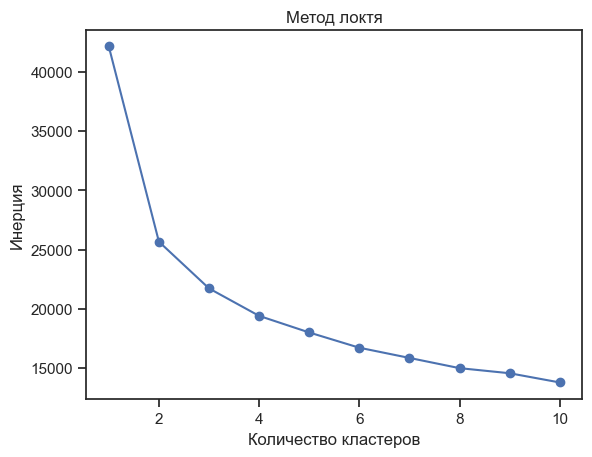

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = X.copy()

# Характеристики для кластеризации
features = df[main_features]

# Нормализация данных
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Определение количества кластеров. Метод "локтя"
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Отображение метода "локтя" для выбора оптимального числа кластеров
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

# Выбор оптимального числа кластеров из графика метода "локтя"
optimal_clusters = 3

# Применение k-means кластеризации
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(features_scaled)

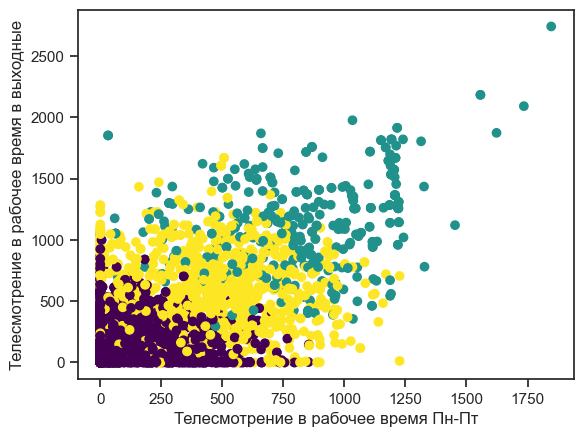

In [51]:
plt.scatter(df['Телесмотрение в рабочее время Пн-Пт'], df['Телесмотрение в рабочее время в выходные'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Телесмотрение в рабочее время Пн-Пт')
plt.ylabel('Телесмотрение в рабочее время в выходные');

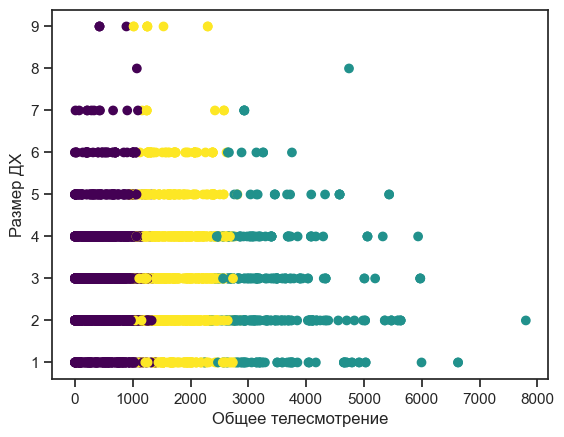

In [52]:
plt.scatter(df['Общее телесмотрение'], df['Размер ДХ'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Общее телесмотрение')
plt.ylabel('Размер ДХ');

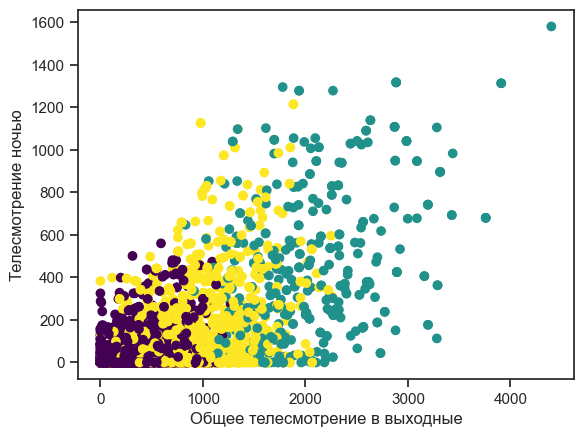

In [53]:
plt.scatter(df['Общее телесмотрение в выходные'], df['Телесмотрение ночью'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Общее телесмотрение в выходные')
plt.ylabel('Телесмотрение ночью');